# **[Proyecto Parcial 2] - Marcos Damian Pool Canul.ipynb**

Importamos todas las librerias que nos seran utilies para realizar este proyecto. Usamos la libreria **Sklearn** que nos servira para la validacion cruzada, kneighbors, regresion logistica, ramdom forest, adaboost, matrix de confusion, etc.  

In [550]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import itertools as it
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from statistics import StatisticsError
from statistics import mode

Leemos los datos del archivo csv llamado "DatosKarenApp.csv" y los mostramos en pantalla.

In [551]:
KarenApp = pd.read_csv("DatosKarenApp.csv")
KarenApp.head()

,Unnamed: 0,Alert,IQR,Kurto,Entro,Skewn,Sex,Comp,Picos,Umbral,Gama
0,1,False,2.6938,1.73447,1.76160,0.140613,Mujer,Slim,0,15.708,Alta
1,2,False,2.5478,2.08198,1.71931,0.104144,Mujer,Slim,0,15.861,Alta
2,3,False,2.5754,3.82861,1.53336,0.687755,Mujer,Slim,2,17.283,Alta
3,4,False,2.5976,1.97106,1.74680,-0.076770,Mujer,Slim,1,17.490,Alta
4,5,False,2.5725,1.94219,1.73949,0.130674,Mujer,Slim,0,15.621,Alta


Este es el total de datos con los que trabajaremos de ahora en adelante.

In [552]:
KarenApp.shape

(1192, 11)

Eliminalos la primera columna ya que no nos sirve para nada.

In [553]:
KarenApp = KarenApp.drop(['Unnamed: 0'],axis=1)
KarenApp.head()

,Alert,IQR,Kurto,Entro,Skewn,Sex,Comp,Picos,Umbral,Gama
0,False,2.6938,1.73447,1.76160,0.140613,Mujer,Slim,0,15.708,Alta
1,False,2.5478,2.08198,1.71931,0.104144,Mujer,Slim,0,15.861,Alta
2,False,2.5754,3.82861,1.53336,0.687755,Mujer,Slim,2,17.283,Alta
3,False,2.5976,1.97106,1.74680,-0.076770,Mujer,Slim,1,17.490,Alta
4,False,2.5725,1.94219,1.73949,0.130674,Mujer,Slim,0,15.621,Alta


Idenificamos los datos de tipo "categoricos" y "numericos" para poder separarlos y ajustarlos.

* Datos categroricos: Gama, Comp y Sex.

In [554]:
categorical_data = KarenApp[["Sex","Comp","Gama"]]

* Datos numericos: Umbral, Picos, Skewn, Entro, Kurto e IQR.

In [555]:
numerical_data = KarenApp[["IQR","Kurto","Entro","Skewn","Picos","Umbral"]]

Y por ultimo tenemos la varible de respuesta.

In [556]:
response_variable = KarenApp["Alert"]

Como ya vimos anteriromen algunas de las varibales de respuesta son categoricas por lo que deben ser codificadas adecuadamente usando variables dummy.

In [557]:
dummies_categoricos = pd.get_dummies(categorical_data)
dummies = pd.DataFrame(dummies_categoricos)
dummies.head()

,Sex_Hombre,Sex_Mujer,Comp_Medium,Comp_Robust,Comp_Slim,Gama_Alta,Gama_Media
0,0,1,0,0,1,1,0
1,0,1,0,0,1,1,0
2,0,1,0,0,1,1,0
3,0,1,0,0,1,1,0
4,0,1,0,0,1,1,0


Comprobamos que los valores van desde 0 a 1.

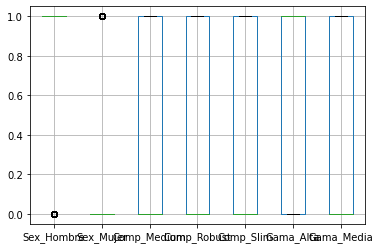

In [558]:
dummies.boxplot()

Estos son los datos de tipo "numericos".

In [559]:
data_numericos = pd.DataFrame(numerical_data)
data_numericos.head()

,IQR,Kurto,Entro,Skewn,Picos,Umbral
0,2.6938,1.73447,1.76160,0.140613,0,15.708
1,2.5478,2.08198,1.71931,0.104144,0,15.861
2,2.5754,3.82861,1.53336,0.687755,2,17.283
3,2.5976,1.97106,1.74680,-0.076770,1,17.490
4,2.5725,1.94219,1.73949,0.130674,0,15.621


Los graficamos

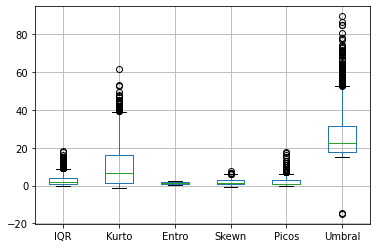

In [560]:
data_numericos.boxplot()

Esta es nuestra variable de respuesta.

In [561]:
variable = pd.DataFrame(response_variable)
variable.head()

,Alert
0,False
1,False
2,False
3,False
4,False


Ya tenemos listos y clasificados todos nuestros datos, ahora podemos aplicar varios metodos.

In [562]:
base = pd.concat([variable,data_numericos.reset_index(drop=True), dummies.reset_index(drop=True)], axis=1)
base.head()

,Alert,IQR,Kurto,Entro,Skewn,Picos,Umbral,Sex_Hombre,Sex_Mujer,Comp_Medium,Comp_Robust,Comp_Slim,Gama_Alta,Gama_Media
0,False,2.6938,1.73447,1.76160,0.140613,0,15.708,0,1,0,0,1,1,0
1,False,2.5478,2.08198,1.71931,0.104144,0,15.861,0,1,0,0,1,1,0
2,False,2.5754,3.82861,1.53336,0.687755,2,17.283,0,1,0,0,1,1,0
3,False,2.5976,1.97106,1.74680,-0.076770,1,17.490,0,1,0,0,1,1,0
4,False,2.5725,1.94219,1.73949,0.130674,0,15.621,0,1,0,0,1,1,0


In [563]:
X = base[["IQR","Kurto","Entro","Skewn","Picos","Umbral","Sex_Hombre","Sex_Mujer","Comp_Medium","Comp_Robust","Comp_Slim","Gama_Alta","Gama_Media"]]
y = base["Alert"]

# EXPLORACION DE LAS VARIBLES DE RESPUESTA

En las siguentes celdas exploraresmo las varibles de respuesta con un boxplot y un histograma de frecuencias.

Nos ayudamos de la siguiente libreria para hacer las graficas.

In [564]:
import matplotlib.pyplot as plt

### Varialbe: IQR

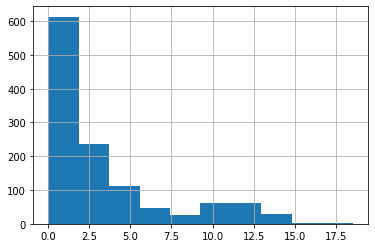

In [565]:
KarenApp.IQR.hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f3330927890>,
 'caps': [<matplotlib.lines.Line2D at 0x7f333092c350>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f33309273d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f333092ce10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f3330933390>],
 'means': []}

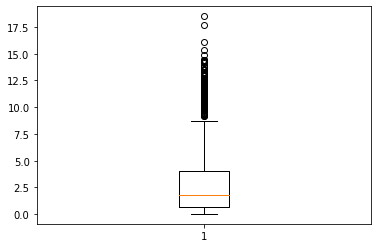

In [566]:
plt.boxplot(KarenApp.IQR)

### Variable: Kurto

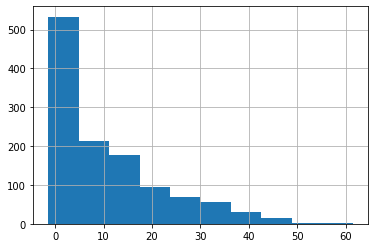

In [567]:
KarenApp.Kurto.hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f333089c4d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f333089cf50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f3330893fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f3330822a50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f3330822f90>],
 'means': []}

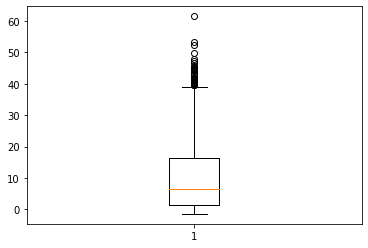

In [568]:
plt.boxplot(KarenApp.Kurto)

### Variable: Entro

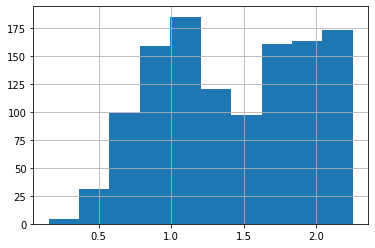

In [569]:
KarenApp.Entro.hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f333078a550>,
 'caps': [<matplotlib.lines.Line2D at 0x7f333078afd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f333078a090>],
 'medians': [<matplotlib.lines.Line2D at 0x7f3330792ad0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f333079a050>],
 'means': []}

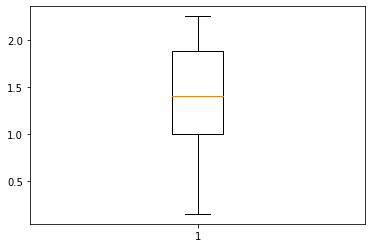

In [570]:
plt.boxplot(KarenApp.Entro)

### Variable: Skewn

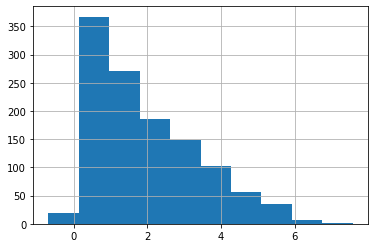

In [571]:
KarenApp.Skewn.hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f333155ca90>,
 'caps': [<matplotlib.lines.Line2D at 0x7f333155ce90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f3331c95090>],
 'medians': [<matplotlib.lines.Line2D at 0x7f33313ed810>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f3331c8d190>],
 'means': []}

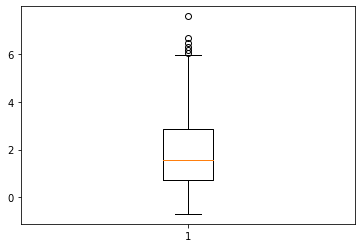

In [572]:
plt.boxplot(KarenApp.Skewn)

### Variable: Picos

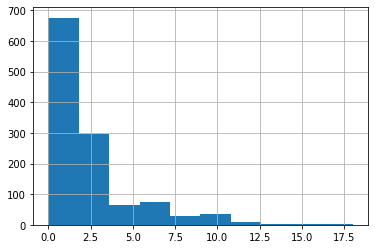

In [573]:
KarenApp.Picos.hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f3331441110>,
 'caps': [<matplotlib.lines.Line2D at 0x7f3331d26ad0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f3331d8e7d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f3330746e10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f3331536390>],
 'means': []}

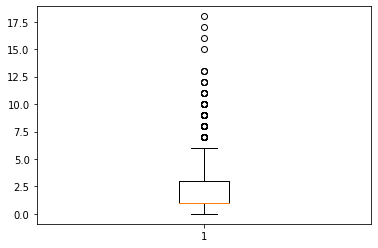

In [574]:
plt.boxplot(KarenApp.Picos)

### Variable: Umbral

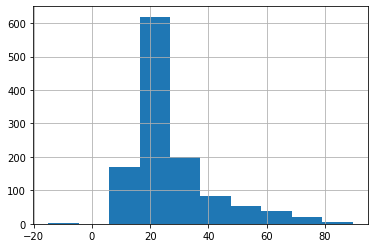

In [575]:
KarenApp.Umbral.hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f33306876d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f333068e190>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f3330687210>],
 'medians': [<matplotlib.lines.Line2D at 0x7f333068ec50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f33306961d0>],
 'means': []}

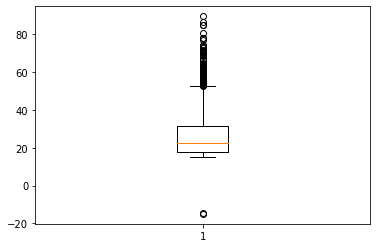

In [576]:
plt.boxplot(KarenApp.Umbral)

# APLICACION DE LOS METODOS

# Metodo: Vecinos mas cercanos


Utilizamos el algoritmo de vecinos cercanos "KNeighborsClassifier" de la libreria **Sklearn** y le pasamos los parametros.

In [577]:
from sklearn.neighbors import KNeighborsClassifier

In [578]:
VecinosCercanos = KNeighborsClassifier(n_neighbors = 5, metric = "minkowski", p = 2)
VecinosCercanos.fit(X,y)
y_pred_inicial = VecinosCercanos.predict(X)

Con la ayuda de **Skalearn** sacamos la matriz de confusion y la imprimimos.

In [579]:
from sklearn.metrics import confusion_matrix

In [580]:
matriz_inicial = confusion_matrix(y, y_pred_inicial)
matriz_inicial

array([[773,  59],
       [ 80, 280]])

Nos ayudamos de la libreria **Sklearn** con la funsion *f1_score* le pasamos los paraemtros y se las asignamos a una variable para despues mostrar el score resultante.

In [581]:
from sklearn.metrics import f1_score

In [582]:
F1 = f1_score(y, y_pred_inicial)
F1

0.8011444921316166

# Metodo: Regresion logistica

Importamos el aolgoritmo de **Skalearn** para la regresion logistica y la aplicamos. 

In [583]:
from sklearn.linear_model import LogisticRegression

In [584]:
RegresionLogistica = LogisticRegression()
RegresionLogistica.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

Nuevamente usamos el algoritmo de matriz de confusion para generarla.

In [585]:
matriz_inicial = confusion_matrix(y, y_pred_inicial)
matriz_inicial

array([[773,  59],
       [ 80, 280]])

Por ultimo obtenemos el "f1_score" con el algoritmo.

In [586]:
F1 = f1_score(y, y_pred_inicial)
F1

0.8011444921316166

# Metodo: Ramdom forest

Con la libreria de **Sklearn** usamos el algoritmo de *RandomForestRegressor* para calcularlo.

In [587]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [588]:
regresion = RandomForestRegressor(n_estimators=20, random_state=0)
Arboles_codigo = RandomForestClassifier(max_depth=14, random_state=0)
Arboles_codigo.fit(X, y)

y_pred_inicial = Arboles_codigo.predict(X)
matriz_inicial = confusion_matrix(y, y_pred_inicial)

Sacamos la matrix de confusion.

In [589]:
matriz_inicial = confusion_matrix(y, y_pred_inicial)
matriz_inicial

array([[832,   0],
       [  0, 360]])

Y calculamos el score.

In [590]:
F1 =f1_score(y, y_pred_inicial)
F1

1.0

# Metodo: adaboost

Con la ayuda de **Sklearn** aplicamos el ultimo metodo que es *adaboost*

In [591]:
from sklearn.ensemble import AdaBoostClassifier

In [592]:
algoritmo_Adaboost = AdaBoostClassifier(n_estimators=50,learning_rate=1)
model = algoritmo_Adaboost.fit(X, y)
y_pred_inicial = model.predict(X)

Con **skalern** *confusion_matrix* obtenemos la matriz de confusion.

In [593]:
matriz_inicial = confusion_matrix(y, y_pred_inicial)
matriz_inicial

array([[763,  69],
       [ 76, 284]])

Calculamos el score obtenido para despues mostrarlo.

In [594]:
F1 = f1_score(y, y_pred_inicial)
F1

0.7966339410939691

#VALIDACION DE LOS MODELOS

Una vez ya aplicados todos los modelos toca validarlos para saber cual de ellos es el mejor modelo.

Vamos a creear una lista llamada "F1_Scores" donde almacenaremos todos los scores finales para despues imprimirlos y compararlos.

In [595]:
F1_Scores = []

## Validacion: Vecinos mas cercanos

Dividimos los arreglos o matrices en subconjuntos aleatorios de entrenamiento y prueba.

In [596]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

En este paso estandarizamos las características eliminando la media y escalando a la varianza de la unidad.

In [597]:
escalar = StandardScaler()

Aqui ajustamos los datos y luego los trasnformamos.

In [598]:
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

Ajustamos el clasificador de k vecinos más cercanos del conjunto de datos de entrenamiento.

In [599]:
VecinosCercanos.fit(X_train, y_train)
y_pred = VecinosCercanos.predict(X_test)

Generamos e imprimimos la mtriz de confusion.

In [600]:
matriz = confusion_matrix(y_test, y_pred)
matriz

array([[160,  17],
       [ 16,  46]])

Obtenemos el score y almacenamos en la lista previamente creada.

In [601]:
F1 = f1_score(y_test, y_pred)
F1_Scores.append(F1)
F1

0.736

## Validacion: Regresion logistica

Validamos la regresion logistica

In [602]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Estandarizamos las características eliminando la media y escalando a la varianza de la unidad.

In [603]:
escalar = StandardScaler()

Ajustamos los datos y luego los trasnformamos.

In [604]:
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

Se hace el ajuste del modelo de acuerdo con los datos de entrenamiento dados.

In [605]:
RegresionLogistica.fit(X_train, y_train)
y_pred = RegresionLogistica.predict(X_test)

Generamos y mostramos la matriz de confusion.

In [606]:
matriz = confusion_matrix(y_test, y_pred)
matriz

array([[140,  21],
       [ 22,  56]])

Y este es el score obtenido, hay que guardarlo en la lista.

In [607]:
F1 = f1_score(y_test, y_pred)
F1_Scores.append(F1)
F1

0.7225806451612903

## Validacion: Ramdom forest

Validacion del modelo


In [608]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44)

Construimos un bosque de árboles a partir del conjunto de entrenamiento (X, y).

In [609]:
regresion.fit(X_train, y_train)

RandomForestRegressor(n_estimators=20, random_state=0)

Predecimos el objetivo de regresión para X.

El objetivo de regresión pronosticado de una muestra de entrada se calcula como el promedio de los objetivos de regresión pronosticados de los árboles en el bosque.

In [610]:
y_pred = regresion.predict(X_test)
y_pred = Arboles_codigo.predict(X_test)

Sacamos la matriz de confusion.

In [611]:
matriz = confusion_matrix(y_test, y_pred)
matriz

array([[265,   0],
       [  0,  93]])

Guardamos y mostramos el score.

In [612]:
F1 =f1_score(y_test, y_pred)
F1_Scores.append(F1)
F1

1.0

El mejor score hasta ahora.

## Validacion: Adaboost

Hacemos la validacion.

In [613]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Aqui estandarice las características eliminando la media y escalando a la varianza de la unidad.

In [614]:
escalar = StandardScaler()

Ajustamos los datos y luego los trasnformamos sobre los conjuntos.

In [615]:
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

Construimos un bosque de árboles a partir del conjunto de entrenamiento (X, y).

In [616]:
model = algoritmo_Adaboost.fit(X_train, y_train)
y_pred = model.predict(X_test)

Como siempre generamos la matrix de confusion con "confusion_matrix".

In [617]:
matriz = confusion_matrix(y_test, y_pred)
matriz

array([[157,  20],
       [ 20,  42]])

Guardamos el score y lo imprimimos.

In [618]:
F1 =f1_score(y_test, y_pred)
F1_Scores.append(F1)
F1

0.6774193548387096

# COMPARACION DE LOS MODELOS

In [619]:
print("El Score de vecinos mas cercanos es: ", F1_Scores[0])

El Score de vecinos mas cercanos es:  0.736


In [620]:
print("El Score de regresion logistica es: ", F1_Scores[1])

El Score de regresion logistica es:  0.7225806451612903


In [621]:
print("El Score de ramdom forest es: ", F1_Scores[2])

El Score de ramdom forest es:  1.0


In [622]:
print("El Score de adaboost es: ", F1_Scores[3])

El Score de adaboost es:  0.6774193548387096


# GRAFICACION DEL MEJOR MODELO

Podemos observar que "Ramdom forest" es el ganador.

{'whiskers': [<matplotlib.lines.Line2D at 0x7f33305d2750>,
 'caps': [<matplotlib.lines.Line2D at 0x7f33305d8210>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f33305d21d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f33305d8c90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f3330561210>],
 'means': []}

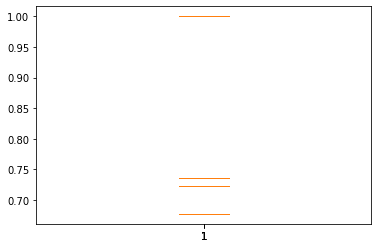

In [623]:
KN = F1_Scores[0]
LR = F1_Scores[1]
RF = F1_Scores[2]
AD = F1_Scores[3]

plt.boxplot(KN)
plt.boxplot(LR)
plt.boxplot(RF)
plt.boxplot(AD)

# CONCLUSION Y ELECION DEL MODELO

Vemos que el metodo de "Ramdom forest" es la mejor porque nos da 1.0 y es el mayor de todos los que evaluamos, por lo tanto nos quedaremos con ese.